In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Đọc dữ liệu
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/diabetes_prediction_dataset.csv')
df.head()
#df = pd.read_csv('diabetes_prediction_dataset.csv)

Mounted at /content/drive


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# **Mô tả và Tiền xử lý dữ liệu**

**Mô tả dữ liệu**

In [ ]:
print("Số cột của tập dữ liệu: ", df.shape[1])
print("Số hàng của tập dữ liệu: ", df.shape[0])

Số cột của tập dữ liệu:  9
Số hàng của tập dữ liệu:  100000


In [ ]:
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [ ]:
#Kiểm tra dữ liệu null và dữ liệu trùng
print('Null: ', df.isnull().sum())
print('Duplicate: ', df.duplicated().sum())

Null:  gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
Duplicate:  3854


**Tiền xử lý dữ liệu**

In [ ]:
#Loại bỏ dữ liệu trùng lặp
df = df.drop_duplicates()
df.shape

(96146, 9)

In [ ]:
df['age'].unique()

array([80.  , 54.  , 28.  , 36.  , 76.  , 20.  , 44.  , 79.  , 42.  ,
       32.  , 53.  , 78.  , 67.  , 15.  , 37.  , 40.  ,  5.  , 69.  ,
       72.  ,  4.  , 30.  , 45.  , 43.  , 50.  , 41.  , 26.  , 34.  ,
       73.  , 77.  , 66.  , 29.  , 60.  , 38.  ,  3.  , 57.  , 74.  ,
       19.  , 46.  , 21.  , 59.  , 27.  , 13.  , 56.  ,  2.  ,  7.  ,
       11.  ,  6.  , 55.  ,  9.  , 62.  , 47.  , 12.  , 68.  , 75.  ,
       22.  , 58.  , 18.  , 24.  , 17.  , 25.  ,  0.08, 33.  , 16.  ,
       61.  , 31.  ,  8.  , 49.  , 39.  , 65.  , 14.  , 70.  ,  0.56,
       48.  , 51.  , 71.  ,  0.88, 64.  , 63.  , 52.  ,  0.16, 10.  ,
       35.  , 23.  ,  0.64,  1.16,  1.64,  0.72,  1.88,  1.32,  0.8 ,
        1.24,  1.  ,  1.8 ,  0.48,  1.56,  1.08,  0.24,  1.4 ,  0.4 ,
        0.32,  1.72,  1.48])

In [ ]:
df['age'] = df['age'].astype(int)
df = df[df['age']!=0]
df.shape

(95236, 9)

In [ ]:
df['diabetes'].value_counts()

,count
diabetes,
0,86754
1,8482


In [ ]:
df['gender'].value_counts()

,count
gender,
Female,55728
Male,39490
Other,18


In [ ]:
#Loại bỏ các dòng có giới tính 'other'
print('Các dòng chứa giá trị "Other" chiếm', round(df[df['gender'] == 'Other'].shape[0] / df.shape[0] * 100, 2), '%')
df = df[df['gender'] != 'Other']
df.shape

Các dòng chứa giá trị "Other" chiếm 0.02 %


(95218, 9)



* 0: Female (Nữ)
* 1: Male( Nam)



In [ ]:
#Chuyển đổi kiểu dữ liệu cột 'gender'
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
df['gender'] = Encoder.fit_transform(df['gender'])
df['gender'].value_counts()

,count
gender,
0,55728
1,39490


In [ ]:
df['smoking_history'].value_counts()

,count
smoking_history,
never,34358
No Info,32018
former,9299
current,9196
not current,6350
ever,3997


In [ ]:
#Loại bỏ các dòng có smoking_history 'No Info'
print('Các dòng chứa giá trị "Other" chiếm', round(df[df['smoking_history'] == 'No Info'].shape[0] / df.shape[0] * 100, 2), '%')
df = df[df['smoking_history'] != 'No Info']
df.shape

Các dòng chứa giá trị "Other" chiếm 33.63 %


(63200, 9)

In [ ]:
#Chuyển đổi kiểu dữ liệu cột 'smoking_history'
df['smoking_history'] = Encoder.fit_transform(df['smoking_history'])
df['smoking_history'].value_counts()

,count
smoking_history,
3,34358
2,9299
0,9196
4,6350
1,3997


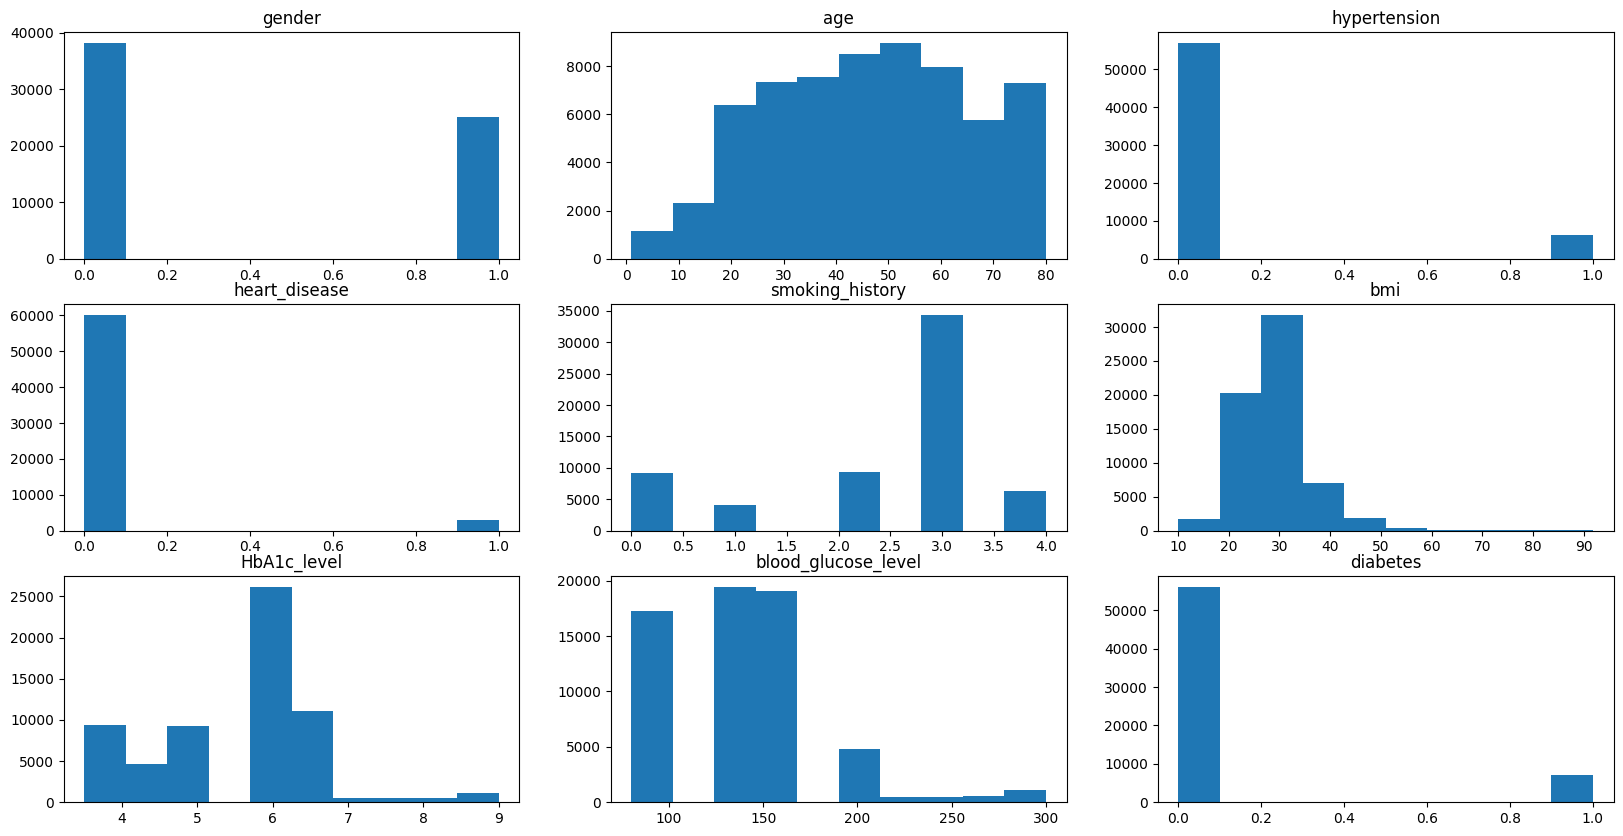

In [ ]:
fig, axis = plt.subplots(3, 3, figsize=(20,10))
m = 0
n = 0
for i in df.columns:
  if m < 3 and n < 3:
    axis[m,n].hist(df[i])
    axis[m,n].set_title(i)
    n += 1
  else:
    m += 1
    n = 0
    axis[m,n].hist(df[i])
    axis[m,n].set_title(i)
    n += 1
plt.show()

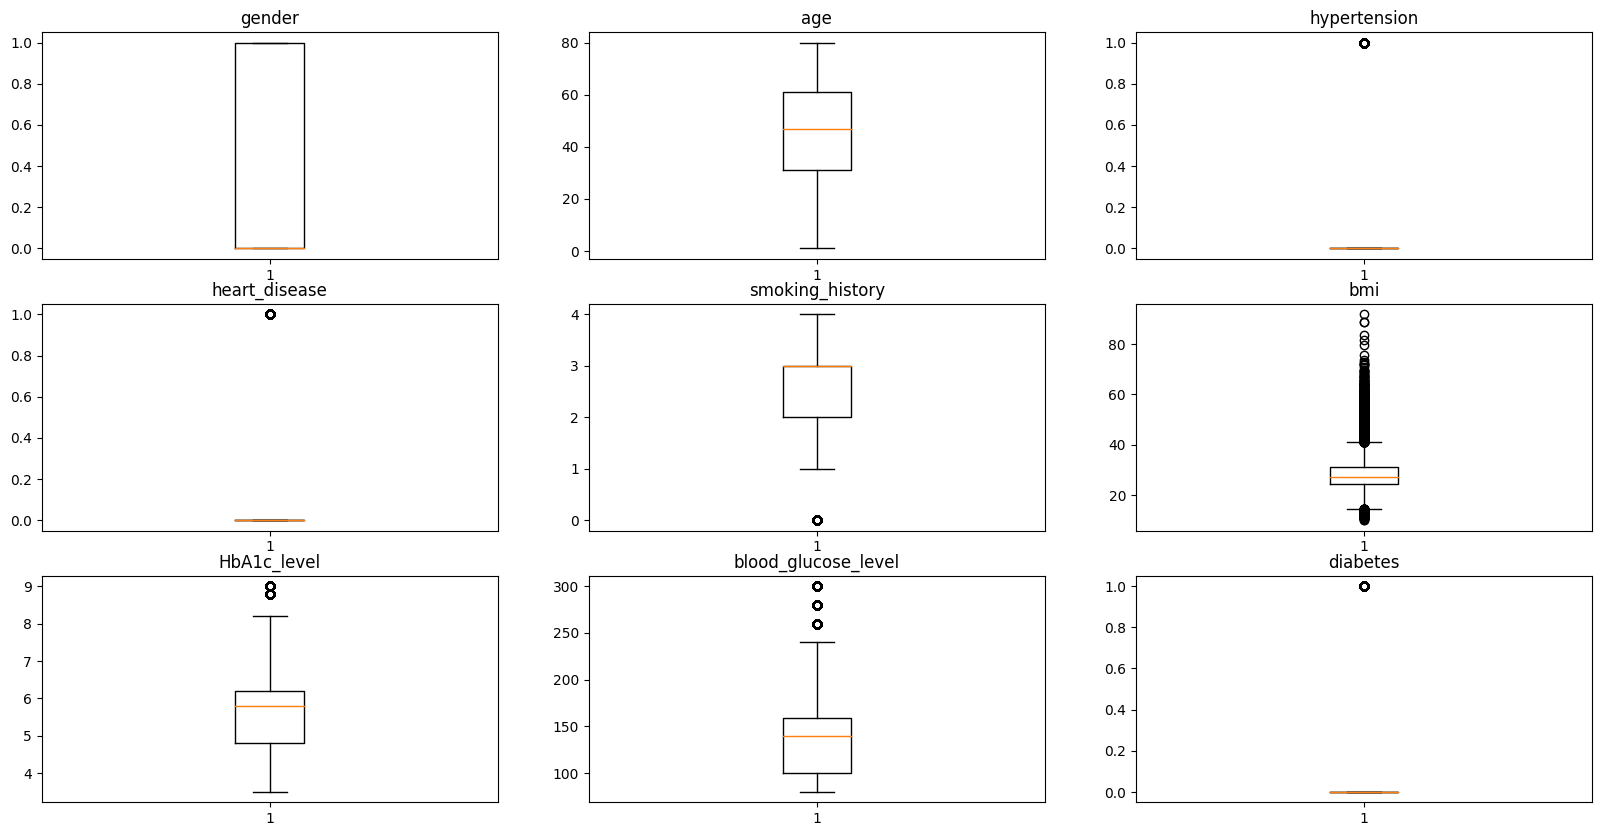

In [ ]:
fig, axis = plt.subplots(3, 3, figsize=(20,10))
m = 0
n = 0
for i in df.columns:
  if m < 3 and n < 3:
    axis[m,n].boxplot(df[i])
    axis[m,n].set_title(i)
    n += 1
  else:
    m += 1
    n = 0
    axis[m,n].boxplot(df[i])
    axis[m,n].set_title(i)
    n += 1
plt.show()

In [ ]:
from scipy import stats
#Hàm tính z-score
def Zscore(df, column):
  threshold = 3
  df['z-score'] = stats.zscore(df[column])
  df = df[(df['z-score'] > -threshold) & (df['z-score'] < threshold)]
  df = df.drop(columns=['z-score'])
  return df
for i in ['bmi','blood_glucose_level', 'HbA1c_level']:
  df = Zscore(df, i)
df.shape

(60339, 9)

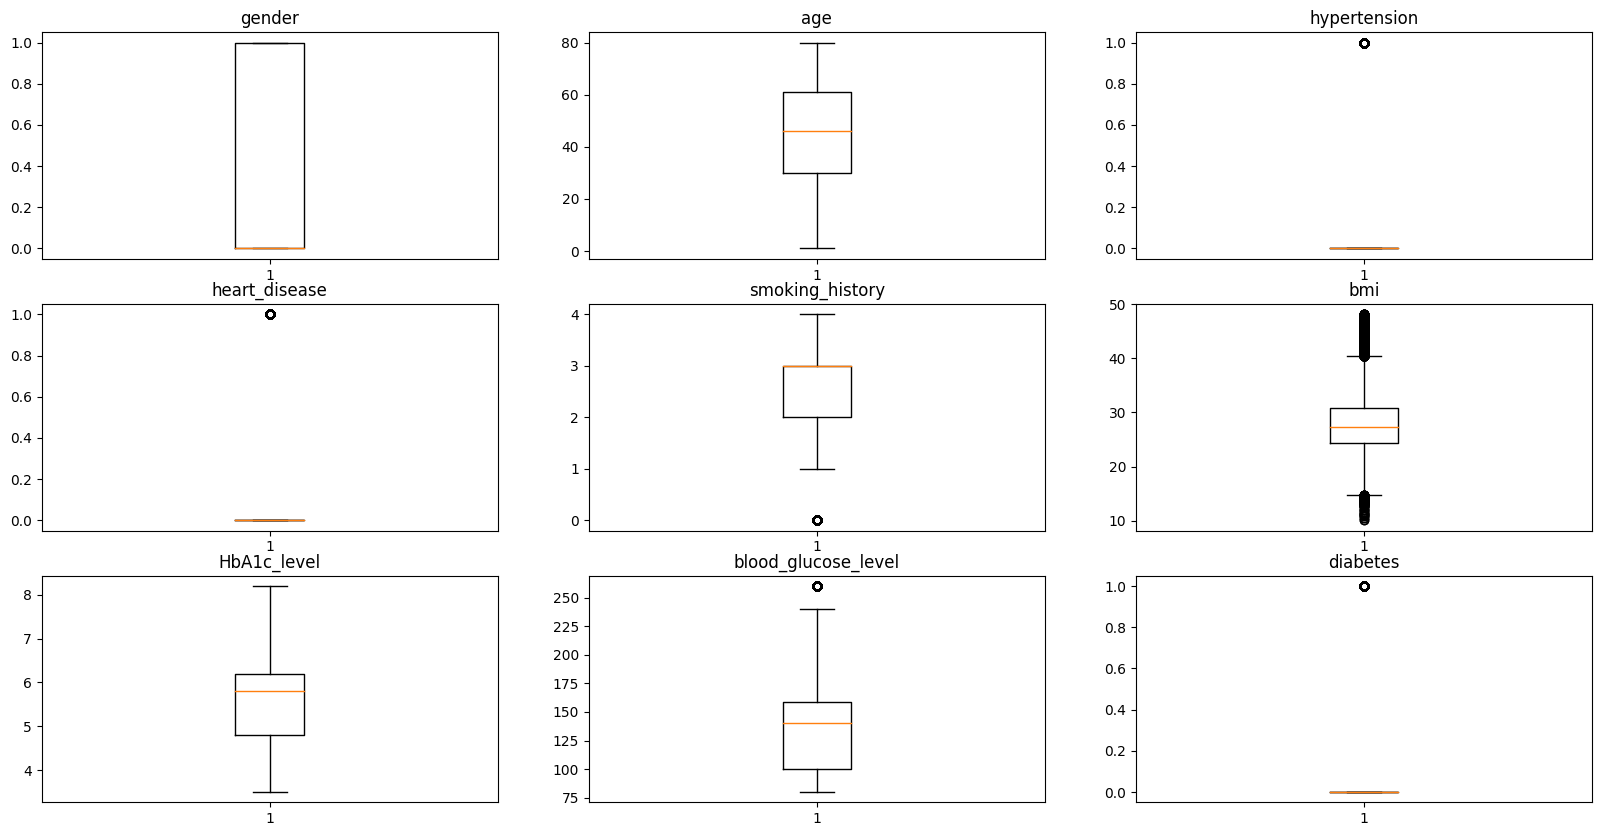

In [ ]:
fig, axis = plt.subplots(3, 3, figsize=(20,10))
m = 0
n = 0
for i in df.columns:
  if m < 3 and n < 3:
    axis[m,n].boxplot(df[i])
    axis[m,n].set_title(i)
    n += 1
  else:
    m += 1
    n = 0
    axis[m,n].boxplot(df[i])
    axis[m,n].set_title(i)
    n += 1
plt.show()

In [ ]:
# Hàm tính IQR
def IQR(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df
df = IQR(df, 'bmi')
df.shape

(57758, 9)

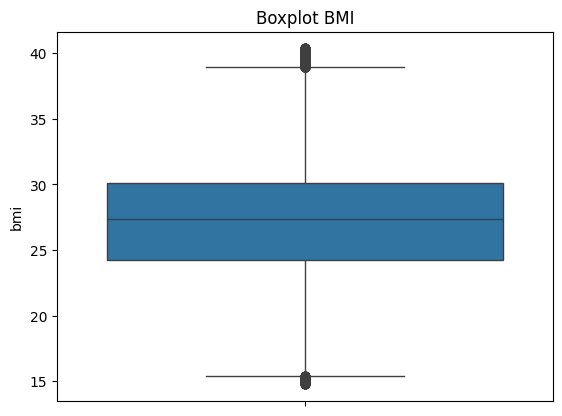

In [ ]:

sns.boxplot(df['bmi'])
plt.title('Boxplot BMI')
plt.show()


In [ ]:
#Tập dữ liệu sau khi tiền xử lý
df.head(12)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,3,25.19,6.6,140,0
2,1,28,0,0,3,27.32,5.7,158,0
3,0,36,0,0,0,23.45,5.0,155,0
4,1,76,1,1,0,20.14,4.8,155,0
5,0,20,0,0,3,27.32,6.6,85,0
6,0,44,0,0,3,19.31,6.5,200,1
8,1,42,0,0,3,33.64,4.8,145,0
9,0,32,0,0,3,27.32,5.0,100,0
10,0,53,0,0,3,27.32,6.1,85,0
12,0,78,0,0,2,36.05,5.0,130,0


In [ ]:
#Lưu tập dữ liệu đã tiền xử lý
df.to_csv('data_cleaned.csv', index=False)


# **PHÂN TÍCH DỮ LIỆU**


**Phân tích dữ liệu**

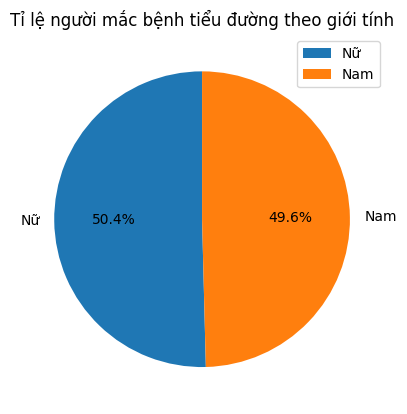

In [ ]:
#Tỉ lệ mắc bệnh giữa nam và nữ
x1 = df['gender'][df['diabetes']==1]
plt.pie(x1.value_counts(), labels = ['Nữ','Nam'], autopct='%1.1f%%',startangle=90)
plt.title('Tỉ lệ người mắc bệnh tiểu đường theo giới tính')
plt.legend()
plt.show()

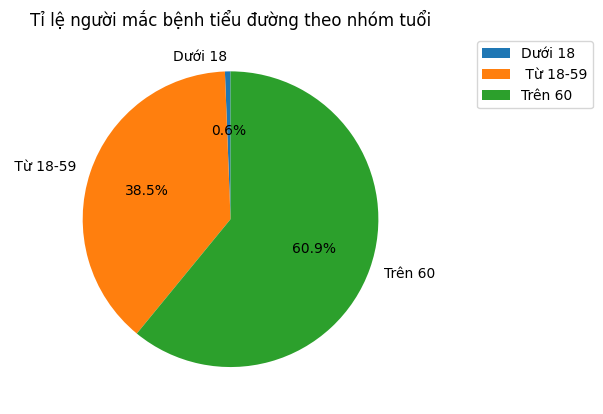

In [ ]:
#Biểu đồ tỉ lệ người mắc bệnh ung thư vú theo nhóm tuổi
age1 = df['diabetes'][(df['diabetes']==1) & (df['age']<18)]
age2 = df['diabetes'][(df['diabetes']==1) & ((df['age']>=18) & (df['age']<60))]
age3 = df['diabetes'][(df['diabetes']==1) & (df['age']>=60)]
labels_age = ['Dưới 18',' Từ 18-59','Trên 60']
plt.pie([age1.shape[0],age2.shape[0],age3.shape[0]], labels = labels_age, autopct='%1.1f%%',startangle=90)
plt.title('Tỉ lệ người mắc bệnh tiểu đường theo nhóm tuổi')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()


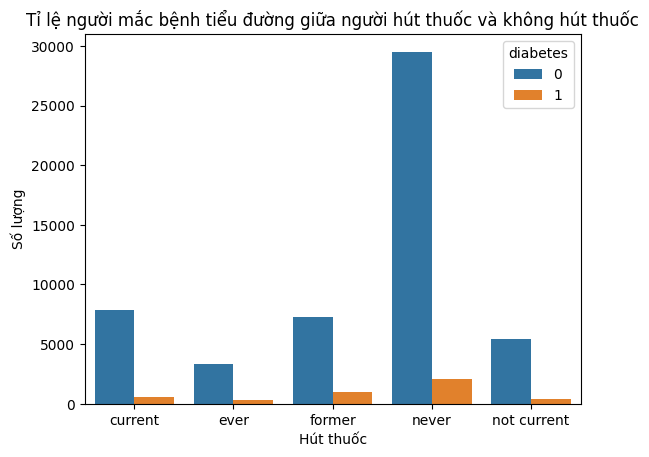

In [ ]:
#Biểu đồ tỉ lệ người mắc bệnh và không mắc bệnh giữa người hút thuốc và không hút thuốc
sns.countplot(x='smoking_history', hue='diabetes', data=df)
plt.xticks(ticks=[0,1,2,3,4], labels=['current','ever', 'former', 'never', 'not current'])
plt.xlabel('Hút thuốc')
plt.ylabel('Số lượng')
plt.title('Tỉ lệ người mắc bệnh tiểu đường giữa người hút thuốc và không hút thuốc')
plt.show()

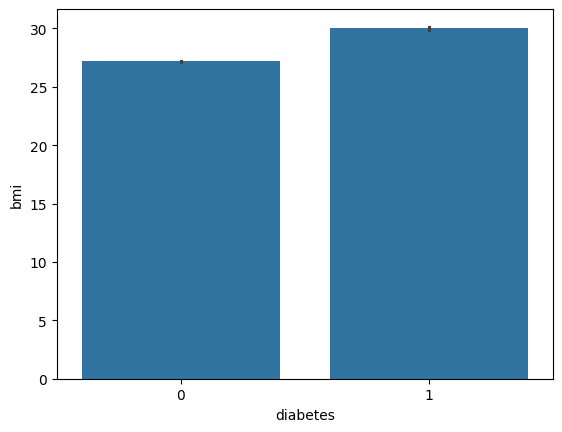

In [ ]:
#Biểu đồ chỉ số bmi trung bình giữa người không bệnh với người bị bệnh
sns.barplot(x='diabetes',y='bmi',data=df)
plt.xlabel('diabetes')
plt.ylabel('bmi')
plt.show()


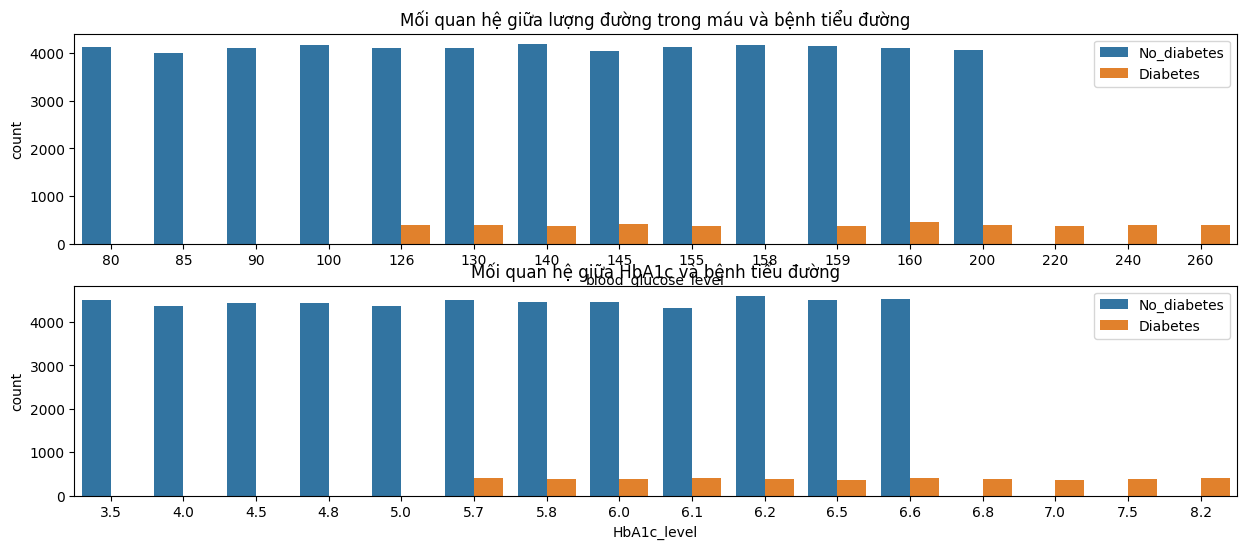

In [ ]:
#Biểu đồ mối quan hệ giữa lượng đường trong máu và bệnh tiểu đường
fig, axis =plt.subplots(2, 1, figsize=(15,6), )

sns.countplot(x='blood_glucose_level',hue='diabetes',data=df, ax=axis[0])
axis[0].set_title('Mối quan hệ giữa lượng đường trong máu và bệnh tiểu đường')
axis[0].legend(["No_diabetes", "Diabetes"])

sns.countplot(x='HbA1c_level',hue='diabetes',data=df, ax=axis[1])
axis[1].legend(["No_diabetes", "Diabetes"])
axis[1].set_title('Mối quan hệ giữa HbA1c và bệnh tiểu đường')
plt.show()

Text(0, 0.5, 'diabetes')

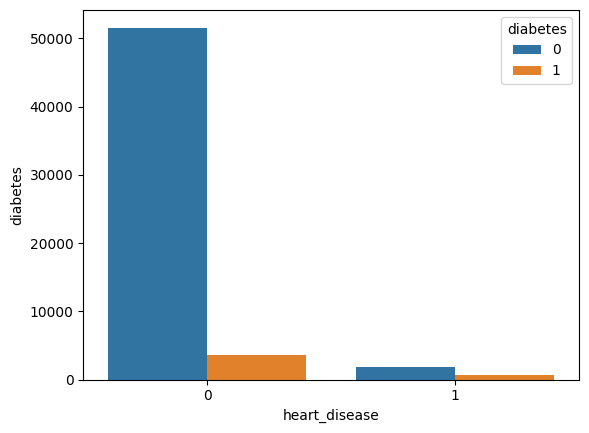

In [ ]:
#Biểu đô mối quan hệ giữa bệnh tim mạch và bệnh tiểu đường
sns.countplot(x='heart_disease',hue='diabetes',data=df)
plt.xlabel('heart_disease')
plt.ylabel('diabetes')

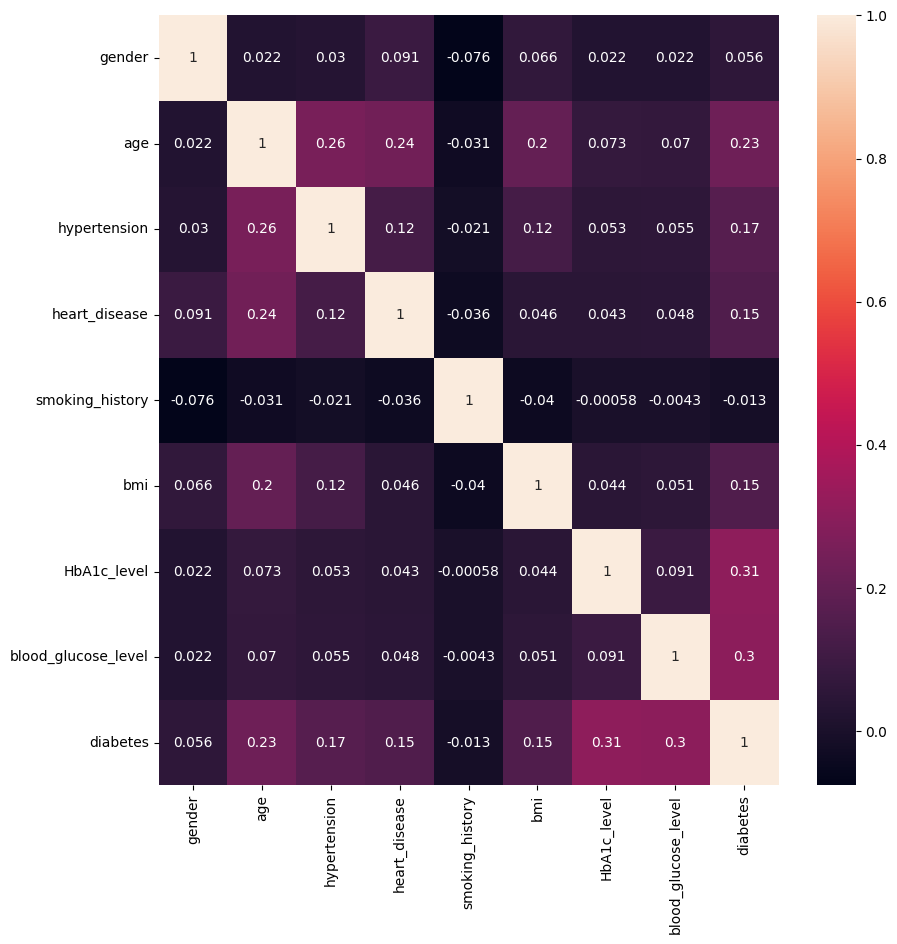

In [ ]:
#Biểu đồ heatmap thể hiện mối tương qua giữa các đặc trưng
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

# **HUẤN LUYỆN MÔ HÌNH**

**Chia tập huấn luyện và đánh giá**

In [ ]:
data = pd.read_csv('datas_cleaned.csv')

In [ ]:
#Chia tập train và test
from sklearn.model_selection import train_test_split
X = data.drop(columns=['diabetes'])
y = data['diabetes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((46206, 8), (11552, 8), (46206,), (11552,))

In [ ]:
#Chuẩn hoá dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Lựa chọn mô hình (model selection)**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = {'RandomForest': RandomForestClassifier(),
          'LogisticRegression': LogisticRegression(max_iter=1000),
          'SVC':  SVC(),
          'KNN': KNeighborsClassifier(),
          'NaiveBayes': GaussianNB()}

def fitModel(models, X_train, y_train, X_test, y_test):

  np.random.seed(42)
  model_score ={}

  for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    model_score[name] = score
  return model_score

In [ ]:
model_score = fitModel(models, X_train, y_train, X_test, y_test)
model_score

{'RandomForest': 0.9603531855955678,
 'LogisticRegression': 0.9478012465373962,
 'SVC': 0.9529951523545707,
 'KNN': 0.9484937673130194,
 'NaiveBayes': 0.8936114958448753}

In [ ]:
model_score = pd.DataFrame(model_score, index=['score'])
model_score

,RandomForest,LogisticRegression,SVC,KNN,NaiveBayes
score,0.960353,0.947801,0.952995,0.948494,0.893611


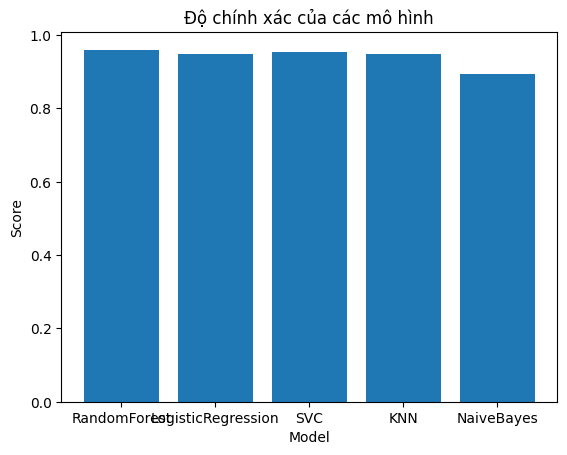

In [ ]:
plt.bar(model_score.columns, model_score.values[0])
plt.title('Độ chính xác của các mô hình')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()

**Tìm tham số tốt nhất cho mô hình**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
# Khởi tạo mô hình
model = RandomForestClassifier(random_state=42)
#Định nghĩa KFolds
cv = KFold(n_splits=5, shuffle=True, random_state=42)
# Định nghĩa lưới tham số
param_grid = {
    'max_depth': [None, 5, 10],
    'max_features': [4,6,8],
    'min_samples_split': [2, 5, 8],
    'n_estimators': [100, 200]}

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=5)

# Huấn luyện mô hình
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10], 'max_features': [4, 6, 8],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=5)

In [ ]:
# Kết quả tốt nhất
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters found:  {'max_depth': 10, 'max_features': 6, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.9655455967954785


In [ ]:
#Huấn luyện mô hình
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=6, min_samples_split=5,
                       random_state=42)

# **Đánh giá mô hình**

**Đánh giá mô hình**

In [ ]:
#Dự đoán trên tập test
y_pred = best_model.predict(X_test)
#In ra giá trị dự đoán và giá trị thực tế
dic = pd.DataFrame({'Thực tế': y_test, 'Dự đoán': y_pred})
print(dic.head(100))

       Thực tế  Dự đoán
10477        0        0
38042        0        0
21430        0        0
24445        0        0
8858         0        0
...        ...      ...
51637        0        0
17470        0        0
8675         0        0
31766        1        1
13774        0        0

[100 rows x 2 columns]


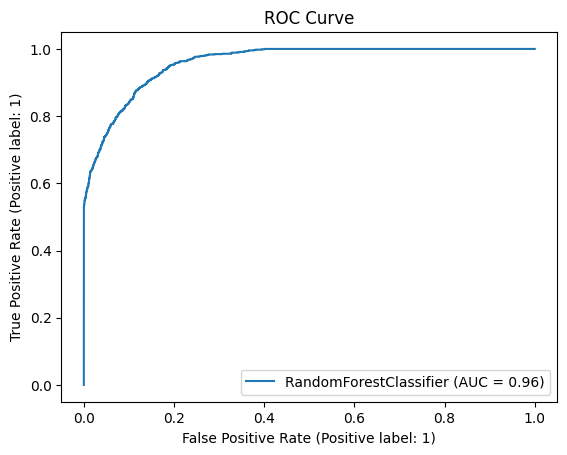

In [ ]:
from sklearn.metrics import RocCurveDisplay

# Plot the ROC curve using RocCurveDisplay
RocCurveDisplay.from_estimator(best_model, X_test, y_test)

plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, y_pred)

array([[10643,     3],
       [  423,   483]])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

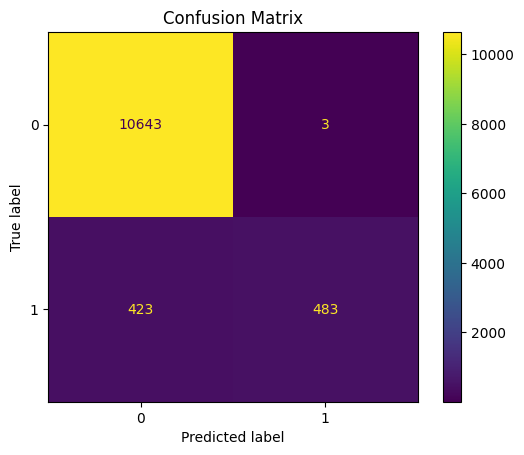

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title('Confusion Matrix')
plt

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10646
           1       0.99      0.53      0.69       906

    accuracy                           0.96     11552
   macro avg       0.98      0.77      0.84     11552
weighted avg       0.96      0.96      0.96     11552



**Feature Important**

In [ ]:
best_model.feature_importances_

array([0.00300078, 0.04277074, 0.00897854, 0.00768587, 0.00264906,
       0.03102258, 0.56914138, 0.33475106])

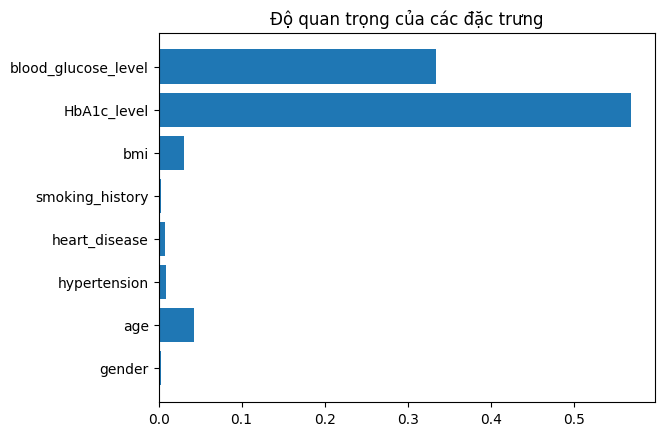

In [ ]:
#Biểu đồ độ quan trọng của các đặc trưng
plt.barh(X.columns, best_model.feature_importances_)
plt.title('Độ quan trọng của các đặc trưng')
plt.show()

**Dự đoán trên dữ liệu mới**

In [ ]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80,0,1,3,25.19,6.6,140
1,1,28,0,0,3,27.32,5.7,158
2,0,36,0,0,0,23.45,5.0,155
3,1,76,1,1,0,20.14,4.8,155
4,0,20,0,0,3,27.32,6.6,85


In [ ]:
def predict_diabetes(age, gender, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level):
  x = np.zeros(len(X.columns))
  x[0] = age
  x[1] = gender
  x[2] = hypertension
  x[3] = heart_disease
  x[4] = smoking_history
  x[5] = bmi
  x[6] = HbA1c_level
  x[7] = blood_glucose_level
  return best_model.predict([x])[0]

In [ ]:
#Dự đoán trên dữ liệu mới
print('Kết quả dự đoán: ', predict_diabetes(70, 0, 1, 0, 3, 30.4, 7.5, 110))

Kết quả dự đoán:  1
